Data Wrangling

In [1]:
import pandas as pd

#Mengimport data csv dari file
file_path =("D:/file my doc/PythonProject/GDGoC/StudentPerformanceFactors.csv")

#Membaca data CSV
data= pd.read_csv(file_path)

In [2]:
#Menampilkan informasi berupa jumlah baris, kolom, tipe data, jmlh nilai not null
data_info= data.info()

#Menampilkan 5 baris pertama dataset
data_head= data.head()

#Menampilkan informasi dataset dan 5 baris pertama
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(None,
    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
 0             23          84                  Low                High   
 1             19          64                  Low              Medium   
 2             24          98               Medium              Medium   
 3             29          89                  Low              Medium   
 4             19          92               Medium              Medium   
 
   Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
 0                         No            7               73              Low   
 1                         No            8               59              Low   
 2                        Yes            7               91           Medium   
 3                        Yes            8               98           Medium   
 4                        Yes            6               65           Medium   
 
   Internet_Access  Tutoring_Sessions Family_Income Teacher_Quali

Data Availability Checking

In [4]:
#Menghitung jumlah nilai yang missing 
missing_values = data.isnull().sum()
#Menghitung persentase nilai yang missing
missing_percentage = (missing_values / len(data)) * 100

#Mennggabungkan hasil ke sebuah dataframe yang terdiri dari 2 kolom yaitu Jumlah dan persentase nilai yang hilang
availability_check = pd.DataFrame({
    "Missing_Values": missing_values,
    "Missing_Percentage(%)": missing_percentage
}).sort_values(by="Missing_Values", ascending=False) #Mengurutkan nilai yang hilang dari yg terbanyak

#Menampilkan data frame
availability_check

,Missing_Values,Missing_Percentage(%)
Parental_Education_Level,90,1.362192
Teacher_Quality,78,1.180566
Distance_from_Home,67,1.014076
Hours_Studied,0,0.000000
Attendance,0,0.000000
Gender,0,0.000000
Learning_Disabilities,0,0.000000
Physical_Activity,0,0.000000
Peer_Influence,0,0.000000
School_Type,0,0.000000


Descriptive Statistics

In [5]:
#Descriptive statistik untuk kolom2 numerik
numerical_stats = data.describe()

#Memilih kolom2 dengan tipe data object
categorical_columns = data.select_dtypes(include='object').columns
#Menghitung jumlah kemunculan tiap ketegori pada kolom
categorical_stats = {col: data[col].value_counts() for col in categorical_columns}

#Menampilakn statistik deskriptif dan distribusi frekuensi
numerical_stats, categorical_stats

(       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
 count    6607.000000  6607.000000   6607.00000      6607.000000   
 mean       19.975329    79.977448      7.02906        75.070531   
 std         5.990594    11.547475      1.46812        14.399784   
 min         1.000000    60.000000      4.00000        50.000000   
 25%        16.000000    70.000000      6.00000        63.000000   
 50%        20.000000    80.000000      7.00000        75.000000   
 75%        24.000000    90.000000      8.00000        88.000000   
 max        44.000000   100.000000     10.00000       100.000000   
 
        Tutoring_Sessions  Physical_Activity   Exam_Score  
 count        6607.000000        6607.000000  6607.000000  
 mean            1.493719           2.967610    67.235659  
 std             1.230570           1.031231     3.890456  
 min             0.000000           0.000000    55.000000  
 25%             1.000000           2.000000    65.000000  
 50%             1.000000 

Exploratory Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Memilih kolom2 numerik
numeric_columns = data.select_dtypes(include=['number'])

#MMenghapus baris yg nilainya hilang
numeric_columns = numeric_columns.dropna()  

#Menghitung matriks korelasi antar kolom numerik
correlation_matrix = numeric_columns.corr()

# Menampilkan matriks korelasi 
print(correlation_matrix)

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

Data Visualization 

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


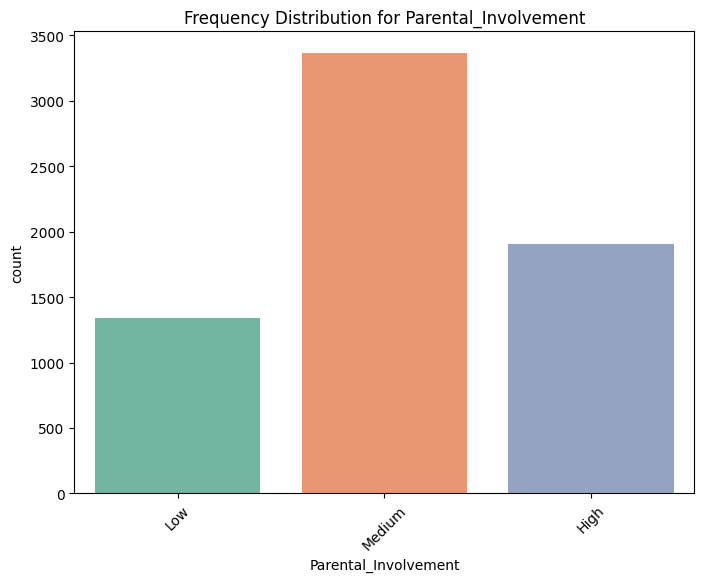

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


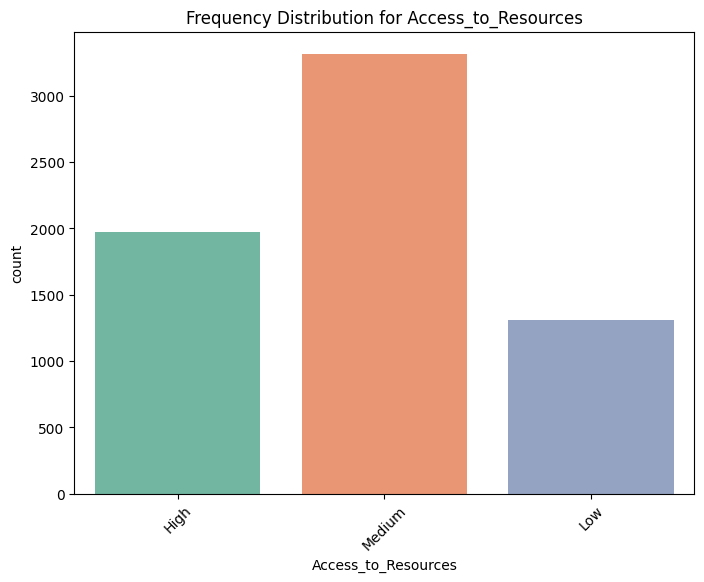

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


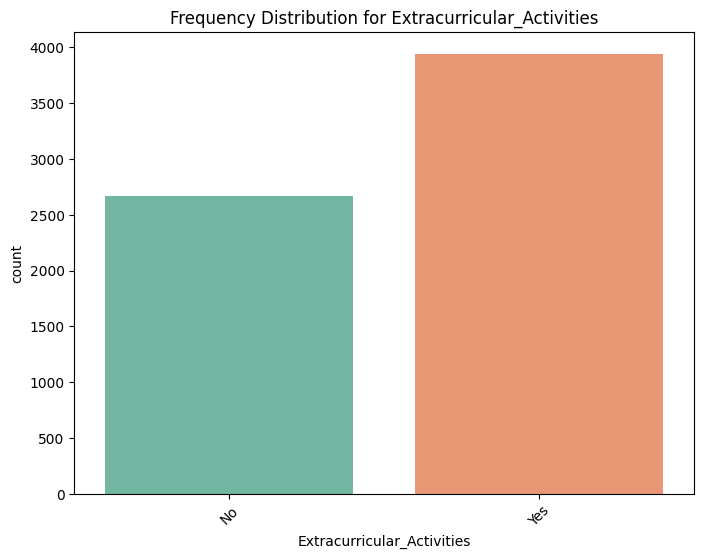

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


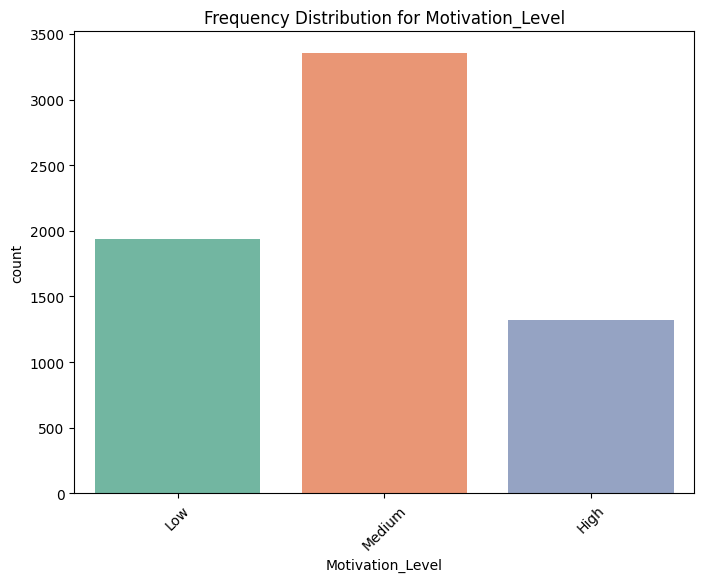

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


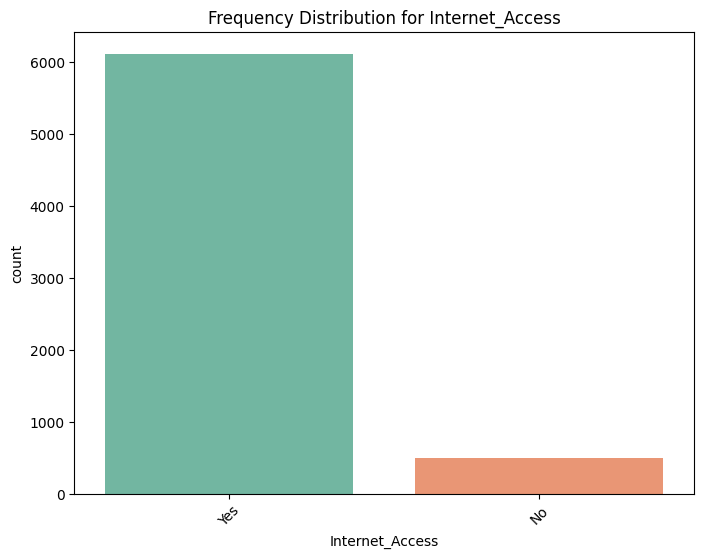

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


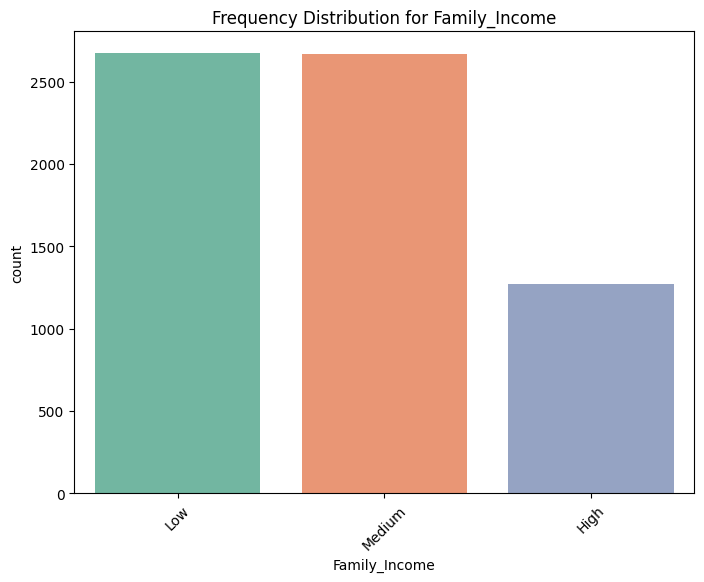

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


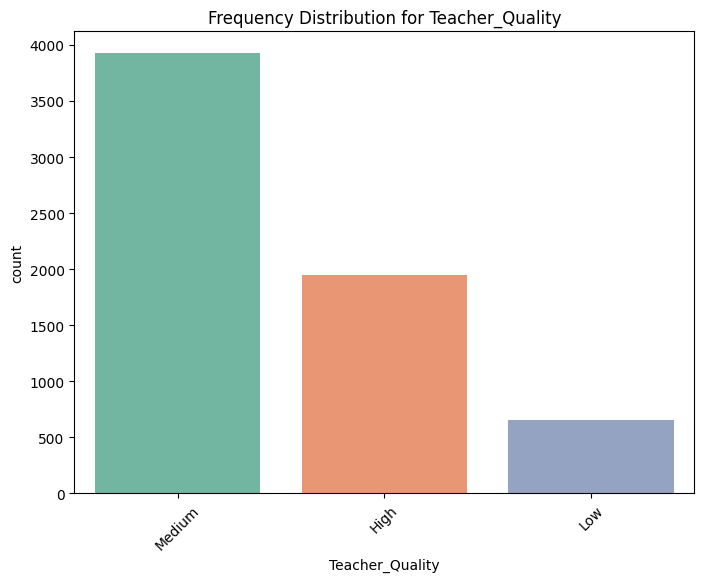

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


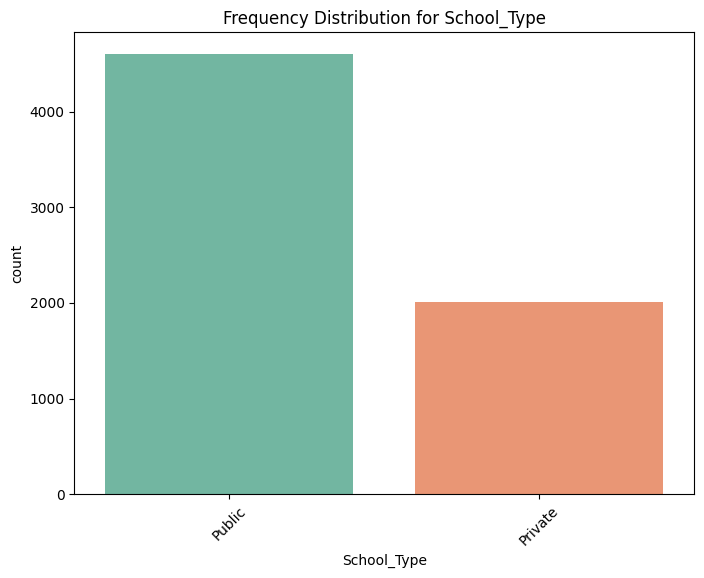

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


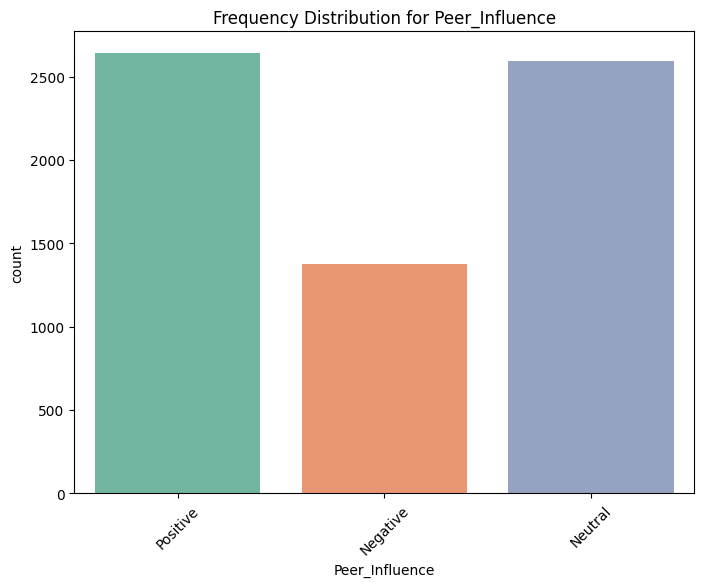

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


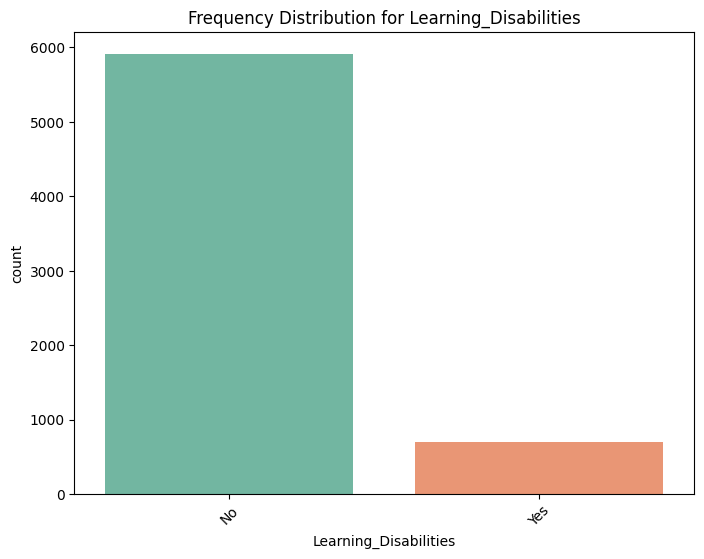

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


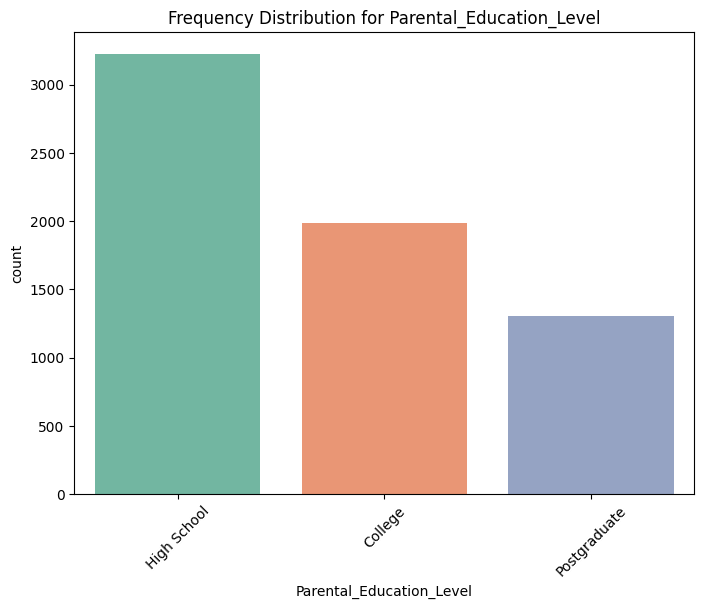

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


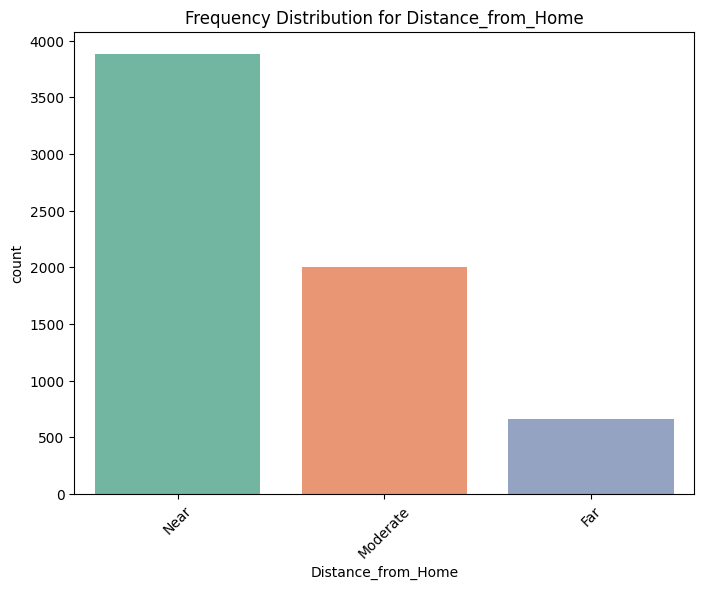

C:\Users\Dell\AppData\Local\Temp\ipykernel_22044\1414842144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


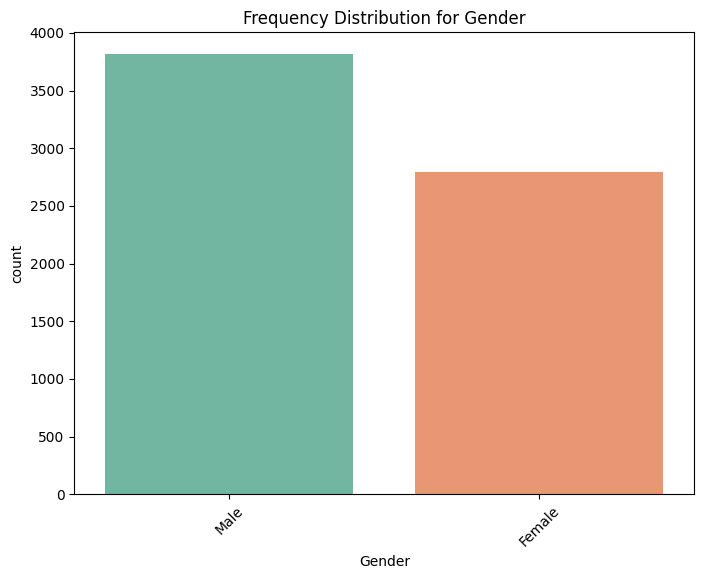

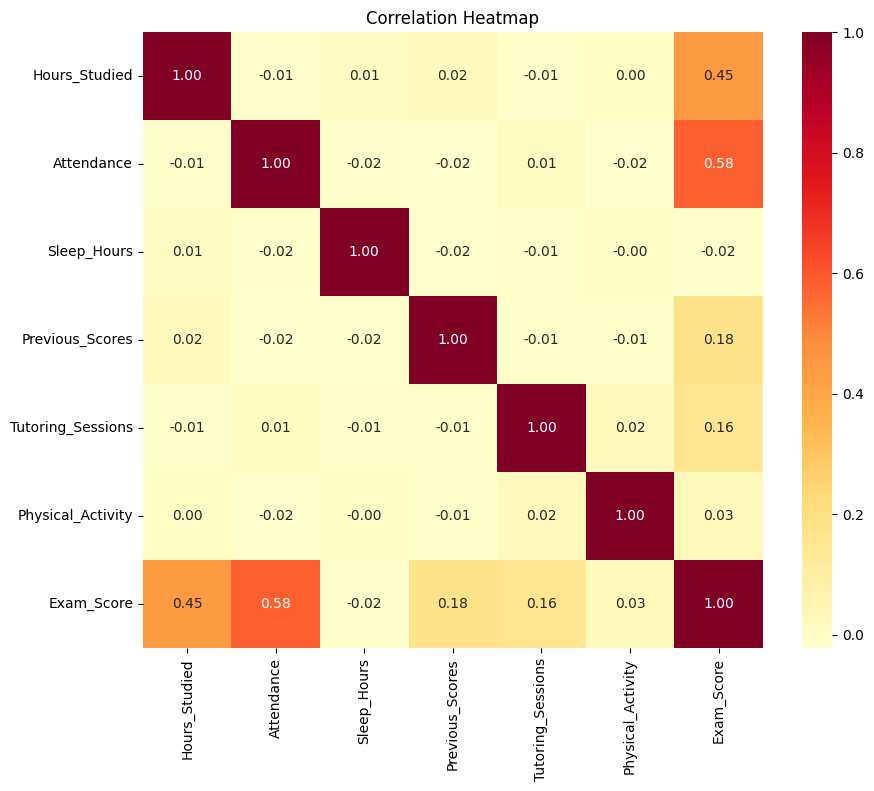

In [8]:
#Memilih kolom2 dengan tipe data object
categorical_columns = data.select_dtypes(include='object').columns

#Melakukan looping tiap kolom kategori
for col in categorical_columns:
    #Membuat figure baru untuk tiap kolom kategori
    plt.figure(figsize=(8, 6))
    #Membuat bar chart menggunakan countplot 
    sns.countplot(data=data, x=col, palette='Set2')
    #Menampilkan judul
    plt.title(f'Frequency Distribution for {col}')
    #Memutar label pada sumbu X agar lebih mudah dibaca
    plt.xticks(rotation=45)
    #Menampilkan grafik
    plt.show()

#Heatmap
#Memilih kolom2 numerik
numeric_columns = data.select_dtypes(include=['number'])

#Menghapus baris yg nilainya hilang
numeric_columns = numeric_columns.dropna()  

#Menghitung matriks korelasi antar kolom numerik
correlation_matrix = numeric_columns.corr()

#Membuat figure baru untuk heatmap
plt.figure(figsize=(10, 8))

#Membuat heatmap dari matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")

#Menampilkan judul
plt.title('Correlation Heatmap')

#Menampilkan heatmap
plt.show()
